# MLR - Problem of Multicollinearity Normality of Errors 

In [9]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as ssp
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
import os
os.chdir(r"C:\Users\willi\OneDrive\Documents\Woolf Institute Data Analytics\Module 3 Predictive Modelling\Live Class Data Sets")

Mulitcollinearity exists if there is a strong linear relationship among the independent variables
It can lead to two serious consequences:
1- Highly unstable model parameters
2- Model fails to accurately predict for out of sample data

In [3]:
# Detecting Muliticollinearity

# Import Data
perindex = pd.read_csv("Performance Index.csv")
print("✅ Dataset Loaded Successfully")
perindex.head(10)
print(perindex.info())
print(perindex.describe())

✅ Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   empid      33 non-null     int64  
 1   jpi        33 non-null     float64
 2   aptitude   33 non-null     float64
 3   tol        33 non-null     float64
 4   technical  33 non-null     float64
 5   general    33 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.7 KB
None
          empid        jpi   aptitude        tol  technical    general
count  33.00000  33.000000  33.000000  33.000000   33.00000  33.000000
mean   17.00000  47.865758  52.660606  53.990606   52.01697  49.036364
std     9.66954   9.458342  10.054991  10.149654    4.98145   5.636432
min     1.00000  31.640000  32.710000  32.560000   41.25000  37.000000
25%     9.00000  41.190000  45.590000  44.890000   48.34000  45.070000
50%    17.00000  49.450000  53.380000  57.040000   51.64000  50.530

In [4]:
jpimodel = smf.ols("jpi~aptitude + tol + technical + general", data=perindex).fit()
print(jpimodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    jpi   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     49.81
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           2.47e-12
Time:                        09:37:50   Log-Likelihood:                -85.916
No. Observations:                  33   AIC:                             181.8
Df Residuals:                      28   BIC:                             189.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.2822      7.395     -7.341      0.0

In [10]:
# Variance Inflation Factor (VIF) - Detecting Multicollinearity

y, x = patsy.dmatrices("jpi~aptitude + tol + technical + general", data=perindex, return_type="dataframe")
vif = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)
print(vif)

Intercept    143.239081
aptitude       1.179906
tol            1.328205
technical      2.073907
general        2.024968
dtype: float64


All VIFs are less than 5, Mulitcollinearity is not present

# Residual vs Predicted Plot

<Axes: xlabel='pred', ylabel='res'>

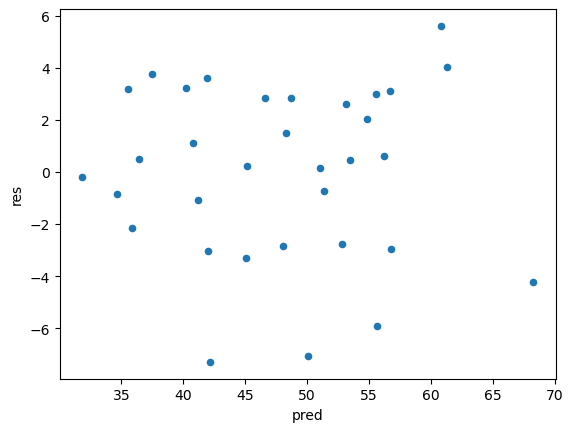

In [13]:
perindex = perindex.assign(pred=pd.Series(jpimodel.fittedvalues))
perindex = perindex.assign(res=pd.Series(jpimodel.resid))

# Residuals vs Fitted Values Plot

perindex.plot.scatter(x="pred", y ="res")

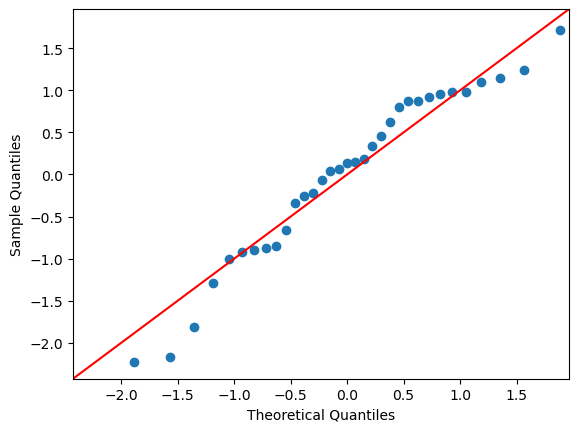

In [14]:
# QQ Plot
fig = sm.graphics.qqplot(perindex.res, line="45", fit=True)

In [17]:
# Shapiro Wilk Test for Normality

sp.stats.shapiro(perindex.res)

ShapiroResult(statistic=0.9498621752849903, pvalue=0.131810381737212)

# Correlation Matrix

Case Study - Modelling Resale Price of Cars

A car garage has old cars for resale. They keep records for different models of cars and their specifications.

To predict the resale price based on the information available about the engine size, horse power, weight and years of use of the cars


In [18]:
# Import Data
ridgedata = pd.read_csv("car price data.csv")
print("✅ Dataset Loaded Successfully")
print(ridgedata.info())
print(ridgedata.describe())

✅ Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MODEL         26 non-null     object 
 1   RESALE PRICE  26 non-null     int64  
 2   ENGINE SIZE   26 non-null     int64  
 3   HORSE POWER   26 non-null     int64  
 4   WEIGHT        26 non-null     int64  
 5   YEARS         26 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ KB
None
       RESALE PRICE  ENGINE SIZE  HORSE POWER       WEIGHT      YEARS
count     26.000000    26.000000    26.000000    26.000000  26.000000
mean    6012.038462  1776.269231    76.346154  1178.653846   4.519231
std     1408.375532   632.369168    32.044896   311.086990   1.091795
min     3490.000000   658.000000    29.000000   650.000000   2.900000
25%     4956.250000  1345.750000    54.250000   968.750000   3.450000
50%     6083.000000  1872.000000    7

Text(0.5, 1.0, 'Fig.No. 2: ScatterPlot Matrix')

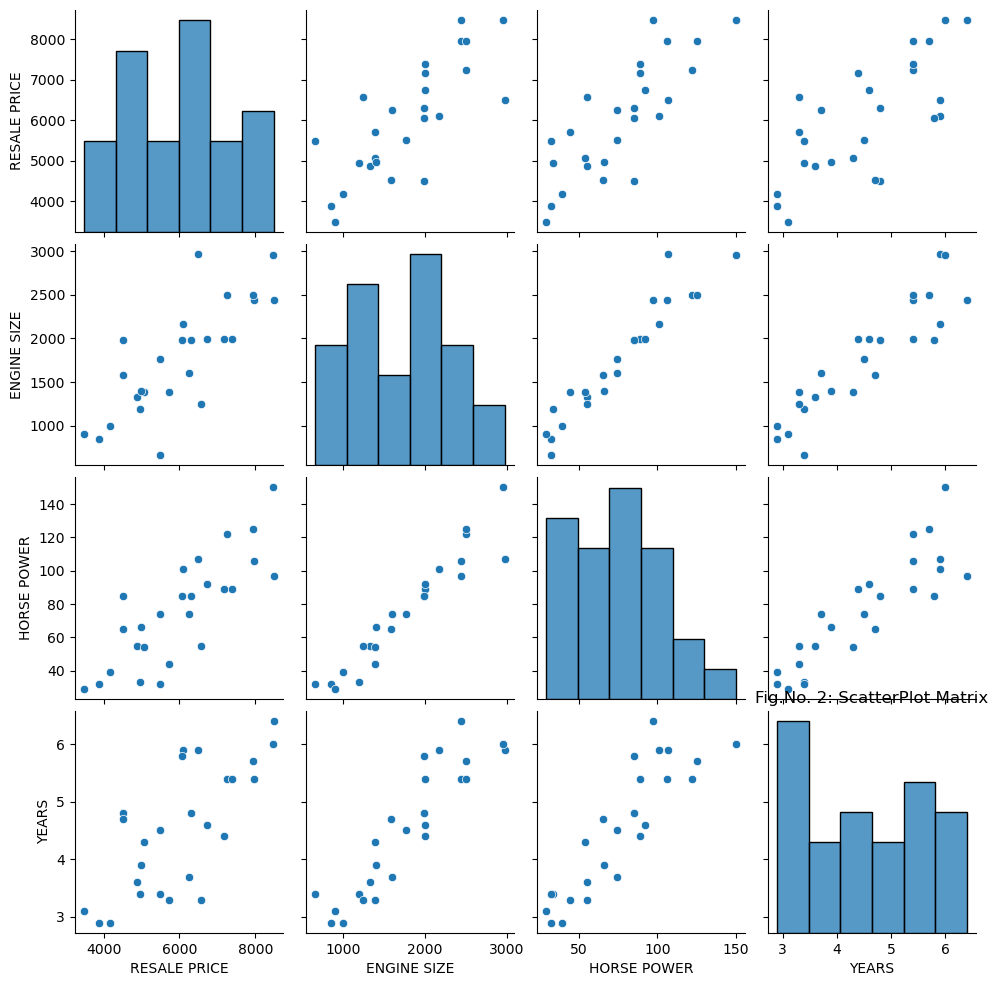

In [19]:
sns.pairplot(ridgedata[['MODEL', 'RESALE PRICE', 'ENGINE SIZE', 'HORSE POWER','YEARS']]);plt.title('Fig.No. 2: ScatterPlot Matrix')


In [20]:
# Detecting Multicollinearity

ridgedata.columns = [c.replace(' ', '_') for c in ridgedata.columns]
model = smf.ols('RESALE_PRICE~ENGINE_SIZE+ HORSE_POWER + WEIGHT + YEARS', data = ridgedata).fit()


In [23]:
# VIF

y, X = patsy.dmatrices('RESALE_PRICE~ENGINE_SIZE+ HORSE_POWER + WEIGHT + YEARS', data=ridgedata, return_type="dataframe")
vif = pd.Series([variance_inflation_factor(X.values, i)for i in range(X.shape[1])],index=X.columns)
print(vif)


Intercept      26.193279
ENGINE_SIZE    15.759113
HORSE_POWER    12.046734
WEIGHT          9.113045
YEARS          13.978640
dtype: float64
